In [10]:
import networkx as nx
import math
import random

from util import parse_graph_from_edgelist_file
from solver import SteinerTreeSolver

# Steiner Tree Problem
Those of you who have already heard the "Netzwerkalgorithmen" lecture are probably familiar with the concept of a *Minimum Spanning Tree*. In short, such a tree graph is a cost-minimal (costs associated with edges) subset of the edges in an undirected graph, such that all nodes are part of this tree (and therefore pairwise connected over a path in the tree). This problem can be solved in polynomial time, e.g. using the algorithm of Kruskal.

A special variant of this problem is the *Steiner Tree* problem. In this problem, some nodes of the graph are labeled as "terminals". Now, the *Steiner Tree* problem asks for the cost-minimal tree within the graph which is "only" required to connect all terminals. Unlike the Minimum Spanning Tree problem, this problem is known to be NP-hard.

In [11]:
"""
G = parse_graph_from_edgelist_file("instances/graph1.edges")
positions = nx.layout.kamada_kawai_layout(G)

for (p, q) in G.edges():
    distance = math.dist(positions[p], positions[q])
    G[p][q]["weight"] = distance

terminals = random.sample(list(G.nodes()), k=G.number_of_nodes() // 2)
nx.draw_networkx(G, pos=positions, node_color=["orange" if v in terminals else "grey" for v in G.nodes()])
"""

'\nG = parse_graph_from_edgelist_file("instances/graph1.edges")\npositions = nx.layout.kamada_kawai_layout(G)\n\nfor (p, q) in G.edges():\n    distance = math.dist(positions[p], positions[q])\n    G[p][q]["weight"] = distance\n\nterminals = random.sample(list(G.nodes()), k=G.number_of_nodes() // 2)\nnx.draw_networkx(G, pos=positions, node_color=["orange" if v in terminals else "grey" for v in G.nodes()])\n'

Set parameter LazyConstraints to value 1
Root node: 120
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 17199 rows, 11436 columns and 703379 nonzeros
Model fingerprint: 0x78007f17
Variable types: 0 continuous, 11436 integer (11436 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 89.8706044
Presolve removed 5702 rows and 53 columns
Presolve time: 0.46s
Presolved: 11497 rows, 11383 columns, 357739 nonzeros
Variable types: 0 continuous, 11383 integer (11383 binary)
A cycle was forbidden!
Root relaxation presolved: 11498 rows, 11383 columns, 357745 nonzeros

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.00s

Solved with dual simplex

R

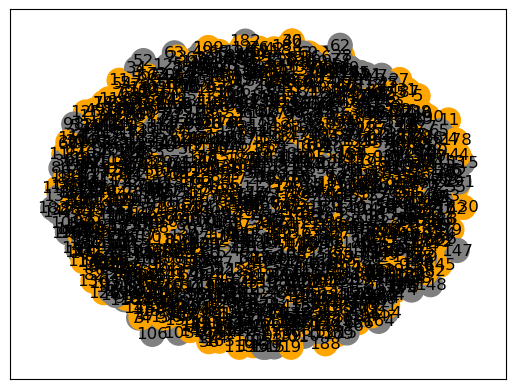

In [12]:
import threading
import time

"""
solver = SteinerTreeSolver(G)
tree = solver.solve(terminals)
nx.draw_networkx_nodes(G, pos=positions, node_color=["orange" if v in terminals else "grey" for v in G.nodes()])
nx.draw_networkx_edges(G, pos=positions, style="dashed", edge_color="lightgrey")
nx.draw_networkx_edges(tree, pos=positions)
nx.draw_networkx_labels(G, pos=positions)
print("Done!")
"""
def run_solver(solver, terminals):
    global optimal_solution
    optimal_solution = solver.solve(terminals)

# Start with a small number of nodes
num_nodes = 195

# Increment the number of nodes by 10 for each iteration
increment = 1

# Set the time limit to 5 minutes
time_limit = 300  # seconds

# Keep track of the largest instance that can be solved within the time limit
largest_size = num_nodes
start_time = time.time()
while time.time() - start_time < 300:
    # Generate a random graph with the specified number of nodes and edge probability
    G = nx.generators.fast_gnp_random_graph(num_nodes, 0.3)
    positions = nx.layout.kamada_kawai_layout(G)

    for (p, q) in G.edges():
        distance = math.dist(positions[p], positions[q])
        G[p][q]["weight"] = distance

    terminals = random.sample(list(G.nodes()), k=G.number_of_nodes() // 2)
    nx.draw_networkx(G, pos=positions, node_color=["orange" if v in terminals else "grey" for v in G.nodes()])

    # Measure the time taken to solve the instance
    solver = SteinerTreeSolver(G)

    # Start a separate thread to run the find_optimum method
    t = threading.Thread(target=run_solver, args=(solver,terminals))
    t.start()

    # Wait for the specified time limit
    t.join(timeout=time_limit)

    # If the separate thread is still running, stop it and return the largest instance that could be solved
    if t.is_alive():
        t.stop()
        print(f"Largest instance that can be solved within {time_limit} seconds: {largest_size} nodes")
        break
    elapsed_time = time.time() - start_time

    # If the time taken is less than the time limit, increase the number of nodes and try again
    if elapsed_time < time_limit:
        largest_size = num_nodes
        num_nodes += increment
    else:
        # If the time limit is reached, return the largest instance that can be solved
        print(f"Largest instance that can be solved within {time_limit} seconds: {largest_size} nodes")
        break